# Pêche morutière française 1500-1950

Données issues de :

Hersart de La Villemarqué Jacqueline, La  pêche morutière française de 1500 à 1950 : statistiques, climat et société, Plouzané, IFREMER, 1995, https://archimer.ifremer.fr/doc/00486/59783/




In [284]:
import pdfplumber
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [65]:
###  Ouvrir le fichier avec pdfplumber et créer un objet
file = "./data/villemarque_peche_morutiere/villemarque_peche_morutiere.pdf"
pdf = pdfplumber.open(file)
#    print(first_page.chars[0])

# Extraction des pages

* Commencer pour le tableau de la page 86 (chiffre à insérer ici) correspondant à la page 86 du PDF, et terminer à la p. 132 (ici) correspondant à la p.134 du PDF.
* Manquent dans ce PDF les pp. *94 et 95*

In [ ]:
page = pdf.pages[132]
# dir(page)

In [586]:
print(page.page_number)
# page.objects

133


In [583]:
p_extract = page.extract_text(x_tolerance=3, y_tolerance=3)
p_extract[:250]

"134  ANNEXE \nI Nombre \nTonnage  Pêche en \nLieu de  Nombre \nAnnée  Port de départ  L *ux  pêche  d'hommes  total  tonnes  Références bibliographiques \n(tonneaux)  métriques \npartis \n1948  FECAMP  20  30  0  0  126161 STATPECH 1950 \n1948  SAINT MALO  8"

In [579]:
try :
    lines = p_extract.split('\n')
except Exception as e:
    print(e)
lines[5:8]

['(tonneaux)  métriques ',
 'partis ',
 '1948  FECAMP  20  30  0  0  126161 STATPECH 1950 ']

In [580]:
years = [re.search("^\d{4}\s.*",l).group() for l in lines if re.search("^\d{4}\s.*", l) ]
years[:3]

['1948  FECAMP  20  30  0  0  126161 STATPECH 1950 ',
 '1948  SAINT MALO  8  30  0  0  59071 STATPECH 1950 ',
 '1948  LA ROCHELLE  1  30  0  0  1871  STATPECH 1950 ']

In [581]:
s = [[y.split('  '), len(y.split('  '))] for y in years]
s[:3]

[[['1948', 'FECAMP', '20', '30', '0', '0', '126161 STATPECH 1950 '], 7],
 [['1948', 'SAINT MALO', '8', '30', '0', '0', '59071 STATPECH 1950 '], 7],
 [['1948', 'LA ROCHELLE', '1', '30', '0', '0', '1871', 'STATPECH 1950 '], 8]]

In [5]:
i = 86
result_list = []
while i < 133:
    try:
        page = pdf.pages[i]
        pn = page.page_number
        p_extract = page.extract_text(x_tolerance=3, y_tolerance=3)
    except Exception as e:
        print('P – p. ' + i + ' – ', e)
    try :
        lines = p_extract.split('\n')
    except Exception as e:
        print('L - p. ' + i + ' – ', e)
    years = [re.search("^\d{4}\s.*",l).group() for l in lines if re.search("^\d{4}\s.*", l) ]
    s = [[y.split('  '), len(y.split('  ')), i, pn] for y in years]
    result_list += s
    i += 1

In [6]:
len(result_list)

2553

In [7]:
result_df = pd.DataFrame(result_list, columns=['valeurs','effectif','page', 'page_number'])
result_df.head()

,valeurs,effectif,page,page_number
0,"[1508, BREHAT, 1, 30, 0, 0, 0. MORANDIERE 1962 ]",7,86,87
1,"[1508, ROUEN, 4, 1, 0, 0, o' DARDEL 1941 ]",7,86,87
2,"[1510, SAINT BRIEUC, 1, 30, 0, 0, 0, MORANDIER...",8,86,87
3,"[1510, ROUEN, 1, 1, 0, 0, 0, DARDEL 1941 ]",8,86,87
4,"[1512, BAYONNE, 1, 30, 0, 0, 01 MORANDIERE 1962 ]",7,86,87


In [8]:
result_df.tail()

,valeurs,effectif,page,page_number
2548,"[1950, | FECAMP, 9, 30, 0, 0, 19070' STATPECH ...",7,132,133
2549,"[1950, i FECAMP, 1, 60, 0, 0., 85 i STATPECH 1...",7,132,133
2550,"[1950, SAINT MALO, 13, 30, 0, 0, 3650! STATPEC...",7,132,133
2551,"[1950, LA ROCHELLE, 2, 30, 0, 0, 2438, STATPEC...",8,132,133
2552,"[1950, ; BORDEAUX, 7, 30, 0, 0,, 16407, STATPE...",8,132,133


In [313]:
len(result_df.groupby(['page'])), len(pages_list)

(47, 47)

Les pages du livre : 135 - 86 = 49

In [11]:
[v[1] for v in result_df['valeurs'] ][:5]

['BREHAT', 'ROUEN', 'SAINT BRIEUC', 'ROUEN', 'BAYONNE']

In [150]:
### Ajouter une colonne au dataframe contenant les ports
result_df['port'] = result_df['valeurs'].apply(lambda x: x[1])

In [151]:
result_df['port']

0             BREHAT
1              ROUEN
2       SAINT BRIEUC
3              ROUEN
4            BAYONNE
            ...     
2548        | FECAMP
2549        i FECAMP
2550      SAINT MALO
2551     LA ROCHELLE
2552      ; BORDEAUX
Name: port, Length: 2553, dtype: object

In [315]:
result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST MALO', 'SAINT MALO'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('STMALO', 'SAINT MALO'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('.SAINT MALO', 'SAINT MALO'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('SANT NAZARE', 'SAINT NAZARE'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST BRIEUC', 'SAINT BRIEUC'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('STBRIEUC', 'SAINT BRIEUC'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('SYBRIEUC', 'SAINT BRIEUC'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('inconnu', 'Inconnu'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST PIERRE', 'SAINT PIERRE'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('GRAVEUNES', 'GRAVELINES'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('STVALCAUX', 'Saint-Valery-en-Caux'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST VALERY CAUX', 'Saint-Valery-en-Caux'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST VAL CAUX', 'Saint-Valery-en-Caux'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST JEAN LUZ', 'SAINT JEAN LUZ'))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('ST JEAN LUZ', 'SAINT JEAN LUZ'))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('SABLES OLONNE', "SABLES D'OLONNE"))

result_df['port'] = result_df['port'].apply(lambda x: x.replace('1 ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('| ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace(': ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('i ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('! ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace(', ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('. ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('; ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace(", ", ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('j ', ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace("' ", ''))
result_df['port'] = result_df['port'].apply(lambda x: x.replace('"', '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("'", '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("•", '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("••", '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("(", '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("[", '').strip())
result_df['port'] = result_df['port'].apply(lambda x: x.replace("••", '').strip())

In [516]:
# dir(result_df['port'].value_counts())
t = [[l,v] for l,v in result_df['port'].value_counts().iteritems()]
t[60:65]

[['l LA ROCHELLE', 1],
 ['ST MAL0', 1],
 ['SAINT-PIERRE', 1],
 ['DOUARNENEZ', 1],
 ['ST BR1EUC', 1]]

In [66]:
### Ajouter une colonne au dataframe contenant les annees
result_df['annee'] = result_df['valeurs'].apply(lambda x: x[0])

In [67]:
result_df['annee']

0       1508
1       1508
2       1510
3       1510
4       1512
        ... 
2548    1950
2549    1950
2550    1950
2551    1950
2552    1950
Name: annee, Length: 2553, dtype: object

In [68]:
result_df['annee'] = result_df['annee'].apply(lambda x: x.replace("'", '').strip())
result_df['annee'] = result_df['annee'].apply(lambda x: x.replace('"', '').strip())
result_df['annee'] = result_df['annee'].apply(lambda x: x.replace('7791', '1791').strip())
result_df['annee'] = result_df['annee'].apply(lambda x: int(x))

In [108]:
count_annees = [[l,v] for l,v in result_df['annee'].value_counts().iteritems()]
count_annees[:10]

[[1786, 27],
 [1919, 26],
 [1784, 24],
 [1818, 24],
 [1899, 23],
 [1889, 23],
 [1773, 23],
 [1921, 22],
 [1932, 22],
 [1896, 21]]

In [101]:
i = 1501
years_list = []
while i < 1951:
    years_list.append(i)
    i += 1
years_list[:5]   

[1501, 1502, 1503, 1504, 1505]

In [109]:
count_annees.sort(key=lambda x: x[0])
count_annees[:4]

[[1508, 2], [1510, 2], [1512, 1], [1517, 1]]

In [131]:
annees_effectif = []
for y in years_list:
    test = False
    for a in count_annees:        
        if int(a[0]) == y:
            test = True
            annees_effectif.append([y,a[1]])
    if test == False :
        annees_effectif.append([y,0])
        test = True

In [133]:
annees_effectif[5:20]

[[1506, 0],
 [1507, 0],
 [1508, 2],
 [1509, 0],
 [1510, 2],
 [1511, 0],
 [1512, 1],
 [1513, 0],
 [1514, 0],
 [1515, 0],
 [1516, 0],
 [1517, 1],
 [1518, 0],
 [1519, 0],
 [1520, 4]]

In [134]:
count_annees_df = pd.DataFrame(annees_effectif, columns =['annee', 'effectif'])
count_annees_df = count_annees_df.set_index('annee').sort_index()
count_annees_df['effectif'] = count_annees_df['effectif'].apply(lambda x: int(x))
count_annees_df

,effectif
annee,
1501,0
1502,0
1503,0
1504,0
1505,0
...,...
1946,7
1947,6
1948,5


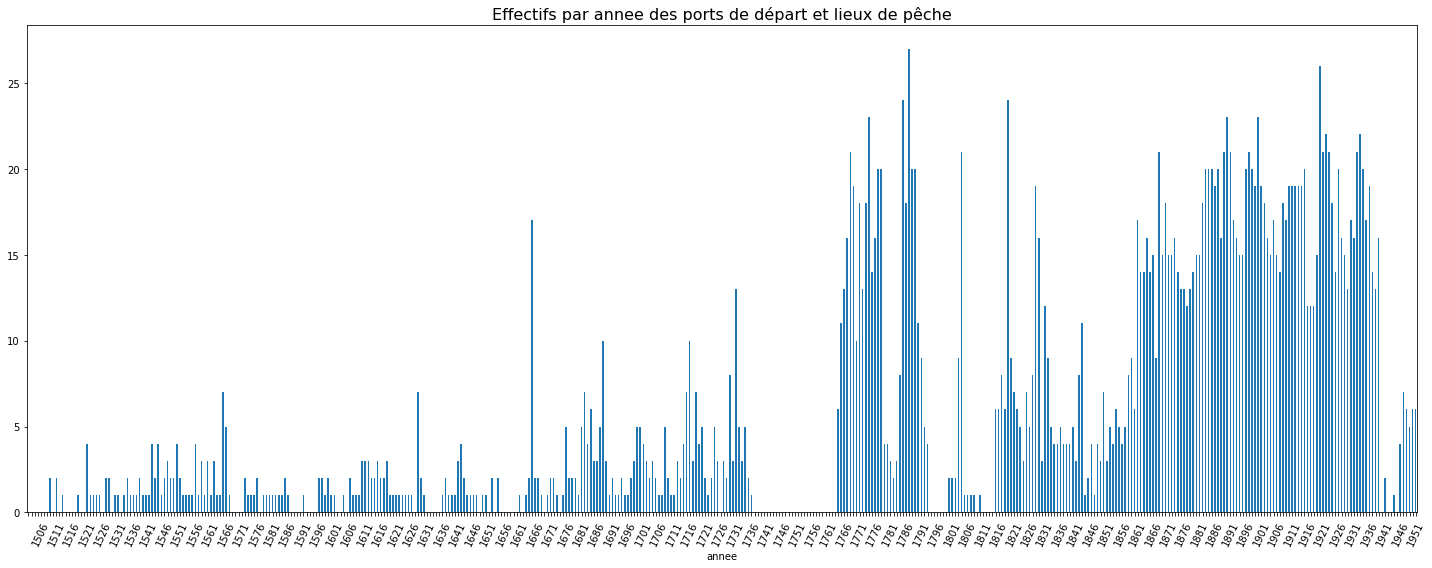

In [247]:
###  https://stackoverflow.com/questions/47838680/matplotlib-xticks-values-in-bar-chart


fig, ax = plt.subplots(figsize = (20,8))
count_annees_df['effectif'].plot(kind='bar')
new_xticks = [a+1 if a % 5 == 0  else None for a in count_annees_df.index ]

idx = np.asarray([i for i in range(len(count_annees_df))])

ax.set_xticks(idx)
ax.set_xticklabels(new_xticks, rotation=65)

plt.title('Effectifs par annee des ports de départ et lieux de pêche',fontsize=16)

fig.tight_layout()

plt.show()

In [142]:
### Ajouter une colonne au dataframe contenant les effectifs des bateaux partis
result_df['eff_bateaux'] = result_df['valeurs'].apply(lambda x: x[2])

In [143]:
result_df['eff_bateaux']

0        1
1        4
2        1
3        1
4        1
        ..
2548     9
2549     1
2550    13
2551     2
2552     7
Name: eff_bateaux, Length: 2553, dtype: object

In [543]:
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("|", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("561", '56').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("L", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace(".", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("_", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("P", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("I", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("j", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace("l", '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace('"', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace('i', '1').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace('H', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace('!', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace(':', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace(';', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace(']', '').strip())
result_df['eff_bateaux'] = result_df['eff_bateaux'].apply(lambda x: x.replace(',', '').strip())

In [327]:
eff_bateaux = [[l,v] for l,v in result_df['eff_bateaux'].value_counts().iteritems()]
eff_bateaux

[['1', 314],
 ['2', 205],
 ['0', 204],
 ['3', 143],
 ['4', 111],
 ['5', 87],
 ['6', 82],
 ['8', 70],
 ['7', 60],
 ['9', 53],
 ['10', 49],
 ['14', 39],
 ['12', 38],
 ['15', 38],
 ['20', 35],
 ['17', 30],
 ['13', 29],
 ['11', 26],
 ['19', 26],
 ['16', 25],
 ['18', 24],
 ['25', 22],
 ['46', 21],
 ['30', 21],
 ['21', 20],
 ['24', 19],
 ['26', 19],
 ['31', 19],
 ['23', 18],
 ['27', 17],
 ['52', 16],
 ['40', 15],
 ['41', 15],
 ['28', 14],
 ['29', 14],
 ['37', 14],
 ['36', 13],
 ['56', 13],
 ['34', 13],
 ['32', 13],
 ['43', 12],
 ['47', 12],
 ['38', 11],
 ['44', 11],
 ['22', 10],
 ['50', 10],
 ['35', 9],
 ['39', 9],
 ['73', 9],
 ['60', 9],
 ['76', 8],
 ['54', 8],
 ['49', 8],
 ['33', 8],
 ['78', 8],
 ['57', 8],
 ['62', 8],
 ['42', 8],
 ['55', 7],
 ['67', 7],
 ['o', 7],
 ['58', 6],
 ['"', 6],
 ['80', 6],
 ['48', 6],
 ['70', 6],
 ['', 6],
 ['91', 6],
 ['i', 6],
 ['64', 5],
 ['88', 5],
 ['65', 5],
 ['79', 5],
 ['!', 5],
 ['45', 5],
 ['53', 5],
 ['72', 5],
 ['75', 5],
 ['82', 5],
 ['74', 5],
 ['90

In [157]:
### Ajouter une colonne au dataframe contenant les codes des lieux de pêche
result_df['lieu_peche'] = result_df['valeurs'].apply(lambda x: x[3])

In [158]:
result_df['lieu_peche']

0       30
1        1
2       30
3        1
4       30
        ..
2548    30
2549    60
2550    30
2551    30
2552    30
Name: lieu_peche, Length: 2553, dtype: object

In [294]:
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("i", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("!", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("J", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("l", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace(",", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("|", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace(":", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace("'", '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace('"', '').strip())
result_df['lieu_peche'] = result_df['lieu_peche'].apply(lambda x: x.replace('501', '50').strip())

In [287]:
lieu_peche = [[l,v] for l,v in result_df['lieu_peche'].value_counts().iteritems()]
lieu_peche

[['30', 942],
 ['50', 695],
 ['10', 170],
 ['20', 149],
 ['1', 147],
 ['71', 99],
 ['0', 85],
 ['60', 54],
 ['72', 36],
 ['70', 15],
 ['301', 13],
 ['40', 11],
 ['41', 11],
 ['32', 10],
 ['43', 6],
 ['501+', 6],
 ['45', 5],
 ['', 5],
 ['6', 3],
 ['601', 3],
 ['4', 3],
 ['50 L', 2],
 ['W', 2],
 ['30j', 2],
 ['3Ô1', 2],
 ['8', 2],
 ['2', 2],
 ['14', 2],
 ['50 1', 2],
 ['31', 2],
 ['M', 2],
 ['46', 2],
 ['01', 2],
 ['44', 2],
 ['201', 1],
 ['3', 1],
 ['60 L_', 1],
 ['-.50.', 1],
 ['103', 1],
 ['S0', 1],
 ['S?', 1],
 ['30t', 1],
 ['114', 1],
 ['7T', 1],
 ['36', 1],
 ['30 j', 1],
 ['50j', 1],
 ['6C', 1],
 ['sa', 1],
 ['7)', 1],
 ['5Ô1', 1],
 ['13', 1],
 ['629', 1],
 ['30 f', 1],
 ['50 \\', 1],
 ['567', 1],
 ['~ 30', 1],
 ['20 [', 1],
 ['50^', 1],
 ['68', 1],
 ['30)', 1],
 ['61', 1],
 ['5C', 1],
 ['30 \\', 1],
 ['126', 1],
 ['5000', 1],
 ['1 L', 1],
 ['0 r', 1],
 ['2450', 1],
 ['24]', 1],
 ['25', 1],
 ['ô1', 1],
 ['401', 1],
 ['•50', 1],
 ['19', 1],
 ['}', 1],
 ['a', 1],
 ['I', 1],
 ['30;', 

## Ajout des labels des lieux de pêche

In [229]:
chemin = 'data/villemarque_peche_morutiere/villemarque_codes_lieux_peche.csv'
codes = pd.read_csv(chemin, sep='|', names=['code', 'label'])
codes

,code,label
0,1,"Lieu de pêche imprécis, Terre-Neuve au sens large"
1,10,Grand Banc de Terre-Neuve
2,20,Iles Saint-Pierre-et-Miquelon
3,30,Côtes de Terre-Neuve
4,31,Terre-Neuve : Plaisance
5,32,Terre-Neuve : Petit-Nord
6,33,Terre-Neuve : côte occidentale
7,40,Canada
8,41,Côte du Labrador
9,42,Ile Saint-Jean (Ile du Prince-Edouard)


In [230]:
codes['code'] = codes['code'].apply(lambda x: str(x))
#result_df['code'] = result_df['code'].apply(lambda x: int(x))

### Jointure des deux tableaux

In [544]:
result_dfm = result_df.merge(codes, left_on = 'lieu_peche', right_on ='code', how='left', indicator=True)
result_dfm[140:150]

,valeurs,effectif,page,page_number,port,annee,eff_bateaux,lieu_peche,code,label,_merge
140,"[1614, HONFLEUR, 15, 30, 0, 140, 0, BREARD 1899 ]",8,88,89,HONFLEUR,1614,15,30,30,Côtes de Terre-Neuve,both
141,"[1614, DUNKERQUE, 7, 50, 0, 0, 0! RIN 1936 ]",7,88,89,DUNKERQUE,1614,7,50,50,Islande,both
142,"[1615, HONFLEUR, 10, 1, 0, 290, OTBRE ARD, 1899 ]",8,88,89,HONFLEUR,1615,10,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
143,"[1615, SAINT MALO, 7, 32, 0, 0, 0, MORAND, JRE...",8,88,89,SAINT MALO,1615,7,32,32,Terre-Neuve : Petit-Nord,both
144,"[1616, HONFLEUR, ""Ï3, 1, 0, 0, "" 0 BREARD J899 ]",7,88,89,HONFLEUR,1616,Ï3,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
145,"[1616, DUNKERQUE, 7, 50, 0, 0, 0; RIN 1936 ]",7,88,89,DUNKERQUE,1616,7,50,50,Islande,both
146,"[1617, SAINT MALO, 120, 10, 0, 0, 0, INNIS 1954 ]",8,88,89,SAINT MALO,1617,120,10,10,Grand Banc de Terre-Neuve,both
147,"[1617, HONFLEUR, 6, 1, 0, 140, 0! BREARD 1899 ]",7,88,89,HONFLEUR,1617,6,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
148,"[1617, DUNKERQUE, 1, 50, 0, 0, 0, RIN 1936 ]",8,88,89,DUNKERQUE,1617,1,50,50,Islande,both
149,"[1618, HONFLEUR, 10, 30, 0i, 0, ""o, BREARD 1899 ]",8,88,89,HONFLEUR,1618,10,30,30,Côtes de Terre-Neuve,both


In [453]:
result_dfm.iloc[10:15]

,valeurs,effectif,page,page_number,port,annee,eff_bateaux,lieu_peche,code,label,_merge
10,"[1521, BAYONNE, 1, 30, 0, 0, 0 i MORANDIERE 19...",7,86,87,BAYONNE,1521,1,30,30,Côtes de Terre-Neuve,both
11,"[1522, FECAMP, 3, 10, 0, 0, 0, MORANDIERE 1962 ]",8,86,87,FECAMP,1522,3,10,10,Grand Banc de Terre-Neuve,both
12,"[1523, LA ROCHELLE, 5, 30, 0, 0, 0, MUSSET 1892 ]",8,86,87,LA ROCHELLE,1523,5,30,30,Côtes de Terre-Neuve,both
13,"[1524, ROUEN, 1, 1, 0, 0, 0, DARDEL 1941 ]",8,86,87,ROUEN,1524,1,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
14,"[1526, ROUEN, 3, 30, 0, 155, 0, MORANDIERE 1962 ]",8,86,87,ROUEN,1526,3,30,30,Côtes de Terre-Neuve,both


# Analyse des données

## Délimitation de périodes chronologiques

In [477]:
exp = result_dfm[(result_dfm['annee'].between(1831,1880)) & (result_dfm['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)
# Pour tester : 1841,1850
# 1831,1880

In [478]:
exp_1 = result_dfm[(result_dfm['annee'].between(1821,1880)) & (result_dfm['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)

In [479]:
exp_2 = result_dfm[(result_dfm['annee'].between(1861,1900)) & (result_dfm['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)

In [370]:
type('1')

str

In [480]:
exp['eff_bateaux'] = exp['eff_bateaux'].apply(lambda x : int(x) if len(x) > 0 else 0)

In [481]:
exp['eff_bateaux'].sum()

3696

In [482]:
exp_1['eff_bateaux'] = exp_1['eff_bateaux'].apply(lambda x : int(x) if len(x) > 0 else 0)

In [483]:
exp_1['eff_bateaux'].sum()

4175

In [484]:
exp_2['eff_bateaux'] = exp_2['eff_bateaux'].apply(lambda x : int(x) if len(x) > 0 else 0)

In [485]:
exp_2['eff_bateaux'].sum()

5693

In [473]:
exp.to_records()

rec.array([(1074, 1841, 'SAINT MALO', 27, '10', 'Grand Banc de Terre-Neuve'),
           (1075, 1841, 'SAINT MALO', 12, '20', 'Iles Saint-Pierre-et-Miquelon'),
           (1076, 1841, 'SAINT MALO', 42, '30', 'Côtes de Terre-Neuve'),
           (1084, 1842, 'SAINT MALO', 21, '10', 'Grand Banc de Terre-Neuve'),
           (1085, 1842, 'SAINT MALO', 10, '20', 'Iles Saint-Pierre-et-Miquelon'),
           (1086, 1842, 'SAINT MALO', 50, '30', 'Côtes de Terre-Neuve'),
           (1087, 1842, 'SAINT BRIEUC', 70, '30', 'Côtes de Terre-Neuve'),
           (1088, 1842, 'PAIMPOL',  1, '10', 'Grand Banc de Terre-Neuve'),
           (1089, 1842, 'PAIMPOL',  9, '30', 'Côtes de Terre-Neuve'),
           (1100, 1847, 'SAINT MALO', 31, '30', 'Côtes de Terre-Neuve'),
           (1108, 1849, 'SAINT MALO', 21, '30', 'Côtes de Terre-Neuve'),
           (1109, 1849, 'SAINT MALO', 46, '10', 'Grand Banc de Terre-Neuve'),
           (1115, 1850, 'SAINT BRIEUC', 35, '30', 'Côtes de Terre-Neuve')],
          dtyp

In [486]:
exp[:5]

,annee,port,eff_bateaux,lieu_peche,label
1074,1841,SAINT MALO,27,10,Grand Banc de Terre-Neuve
1075,1841,SAINT MALO,12,20,Iles Saint-Pierre-et-Miquelon
1076,1841,SAINT MALO,42,30,Côtes de Terre-Neuve
1084,1842,SAINT MALO,21,10,Grand Banc de Terre-Neuve
1085,1842,SAINT MALO,10,20,Iles Saint-Pierre-et-Miquelon


In [487]:
### regrouper et additionner par port et destination pour toute la période
g = exp.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,39
1,BINIC,Iles Saint-Pierre-et-Miquelon,2
2,PAIMPOL,Côtes de Terre-Neuve,114
3,PAIMPOL,Grand Banc de Terre-Neuve,1
4,PAIMPOL,Islande,876
5,SAINT BRIEUC,Côtes de Terre-Neuve,733
6,SAINT BRIEUC,Islande,491
7,SAINT MALO,Côtes de Terre-Neuve,1010
8,SAINT MALO,Grand Banc de Terre-Neuve,283
9,SAINT MALO,Iles Saint-Pierre-et-Miquelon,27


In [488]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv = pd.pivot_table(g,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,39,0,2,0,41
PAIMPOL,114,1,0,876,991
SAINT BRIEUC,733,0,0,491,1224
SAINT MALO,1010,283,27,67,1387
Total,1896,284,29,1434,3643


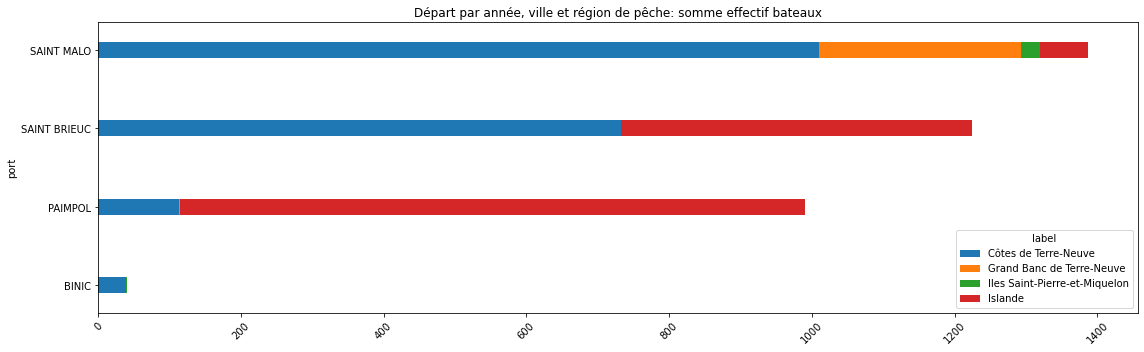

In [390]:
exp_piv.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux')
plt.xticks(rotation=45)
plt.show()

In [490]:
### Total général, dernière cellule de la dernière ligne
exp_piv.iat[-1,-1]

3643

In [491]:
exp_piv.iloc[:-1,:-1]

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande
port,,,,
BINIC,39,0,2,0
PAIMPOL,114,1,0,876
SAINT BRIEUC,733,0,0,491
SAINT MALO,1010,283,27,67


In [492]:
tx = exp_piv.loc[:,["Total"]]
ty = exp_piv.loc[["Total"],:]
n = exp_piv.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


label         Côtes de Terre-Neuve  Grand Banc de Terre-Neuve  \
port                                                            
BINIC                           21                          3   
PAIMPOL                        515                         77   
SAINT BRIEUC                   637                         95   
SAINT MALO                     721                        108   
Total                         1896                        284   

label         Iles Saint-Pierre-et-Miquelon  Islande  Total  
port                                                         
BINIC                                     0       16     41  
PAIMPOL                                   7      390    991  
SAINT BRIEUC                              9      481   1224  
SAINT MALO                               11      545   1387  
Total                                    29     1434   3643  


In [493]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (exp_piv-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


label         Côtes de Terre-Neuve  Grand Banc de Terre-Neuve  \
port                                                            
BINIC                           17                         -3   
PAIMPOL                       -401                        -76   
SAINT BRIEUC                    95                        -95   
SAINT MALO                     288                        174   

label         Iles Saint-Pierre-et-Miquelon  Islande  
port                                                  
BINIC                                     1      -16  
PAIMPOL                                  -7      485  
SAINT BRIEUC                             -9        9  
SAINT MALO                               15     -478  


In [494]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((exp_piv-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande
port,,,,
BINIC,14.618212,3.196267,8.582056,16.138897
PAIMPOL,312.963594,75.269052,7.888828,605.271100
SAINT BRIEUC,14.457766,95.420258,9.743618,0.175478
SAINT MALO,115.010694,282.818663,23.066757,420.189168


2004.8104076019667


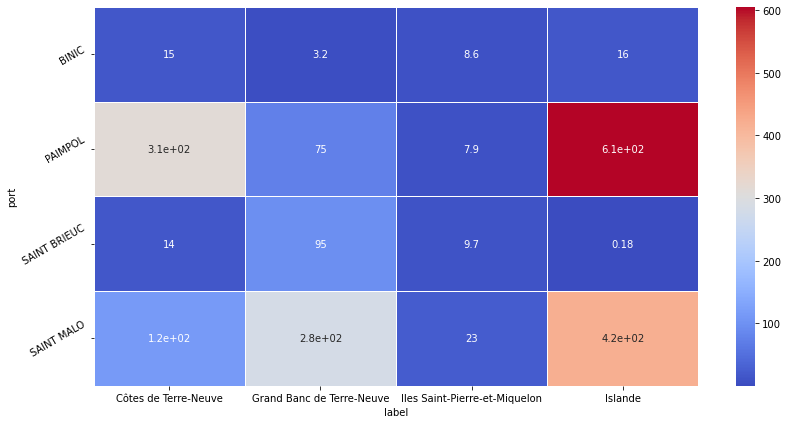

In [495]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(12,6))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)

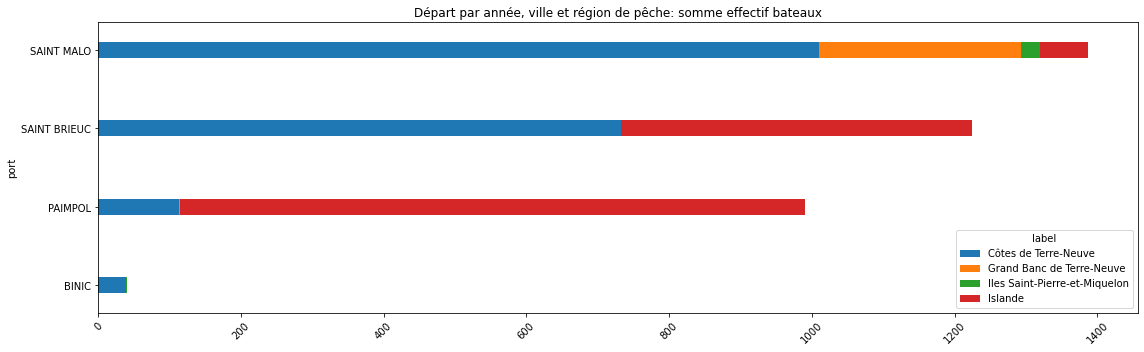

In [496]:
exp_piv.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux')
plt.xticks(rotation=45)
plt.show()

### Première période -> 1860

In [497]:
### regrouper et additionner par port et destination pour toute la période
g1 = exp_1.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g1

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,69
1,BINIC,Iles Saint-Pierre-et-Miquelon,2
2,PAIMPOL,Côtes de Terre-Neuve,144
3,PAIMPOL,Grand Banc de Terre-Neuve,1
4,PAIMPOL,Islande,876
5,SAINT BRIEUC,Côtes de Terre-Neuve,776
6,SAINT BRIEUC,Islande,491
7,SAINT MALO,Côtes de Terre-Neuve,1194
8,SAINT MALO,Grand Banc de Terre-Neuve,283
9,SAINT MALO,Iles Saint-Pierre-et-Miquelon,27


In [506]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv_1 = pd.pivot_table(g1,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv_1

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,69,0,2,0,71
PAIMPOL,144,1,0,876,1021
SAINT BRIEUC,776,0,0,491,1267
SAINT MALO,1194,283,27,67,1571
Total,2183,284,29,1434,3930


In [614]:
def table_chi2 (pivot_table,figsize) :
    tx = pivot_table.loc[:,["Total"]]
    ty = pivot_table.loc[["Total"],:]
    n = pivot_table.iat[-1,-1]   # .iloc[:-1,:-1] 

    ### Compute the matrix multiplication between the columns.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
    indep = tx.dot(ty) / n
    ecarts = (pivot_table-indep)
    ecarts_ponderes = ((pivot_table-indep)**2/indep).iloc[:-1,:-1]
    xi_n = ecarts_ponderes.sum().sum() 
    print(xi_n)

    table = ecarts_ponderes/xi_n
    fig, ax = plt.subplots(figsize=figsize)         
    # Sample figsize in inches
    g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
    labels = ecarts_ponderes.index
    p = g.set_yticklabels(labels, rotation=10)

2081.704065548925


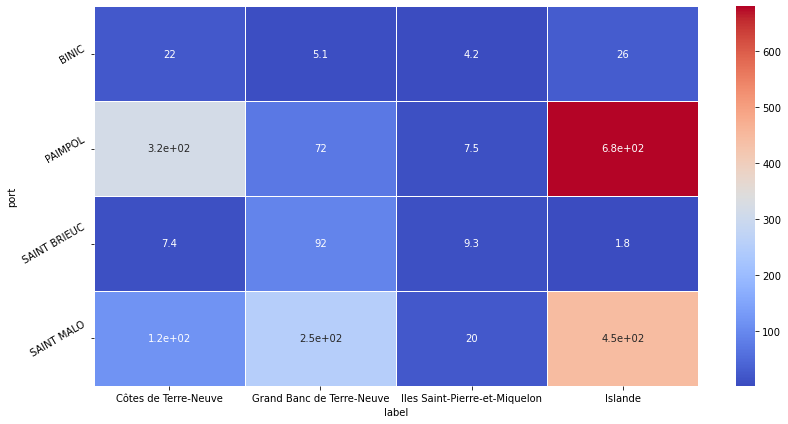

In [607]:
table_chi2(exp_piv_1,(12,6))

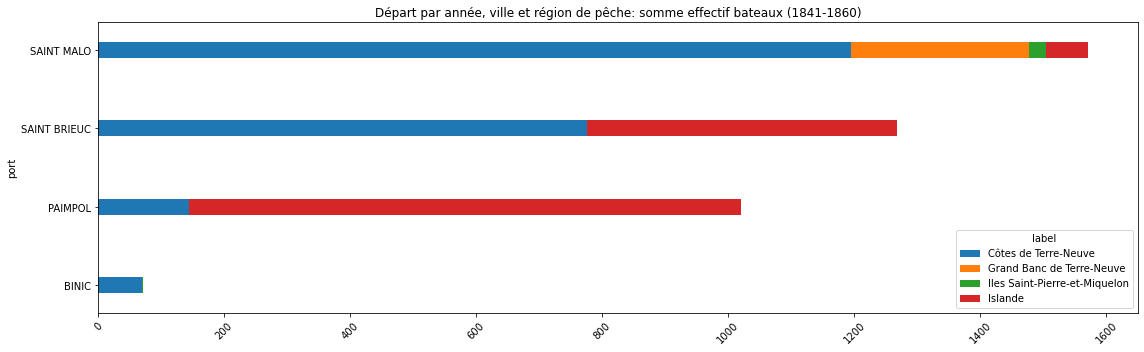

In [509]:
exp_piv_1.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux (1841-1860)')
plt.xticks(rotation=45)
plt.show()

### Deuxième période 1860 ->

In [510]:
### regrouper et additionner par port et destination pour toute la période
g2 = exp_2.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g2

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,143
1,BINIC,Iles Saint-Pierre-et-Miquelon,2
2,BINIC,Islande,265
3,PAIMPOL,Côtes de Terre-Neuve,103
4,PAIMPOL,Islande,1661
5,SAINT BRIEUC,Côtes de Terre-Neuve,653
6,SAINT BRIEUC,Islande,670
7,SAINT MALO,Côtes de Terre-Neuve,1831
8,SAINT MALO,Grand Banc de Terre-Neuve,115
9,SAINT MALO,Iles Saint-Pierre-et-Miquelon,3


In [512]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv_2 = pd.pivot_table(g2,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv_2

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,143,0,2,265,410
PAIMPOL,103,0,0,1661,1764
SAINT BRIEUC,653,0,0,670,1323
SAINT MALO,1831,115,3,110,2059
Total,2730,115,5,2706,5556


3125.1176735397567


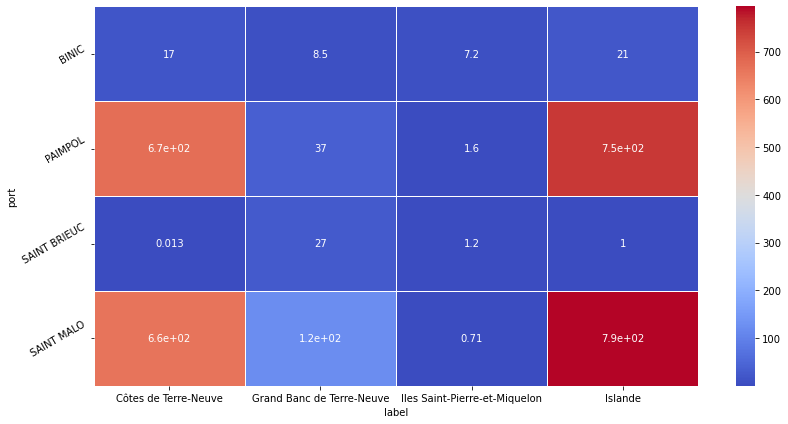

In [608]:
table_chi2(exp_piv_2,(12,6))

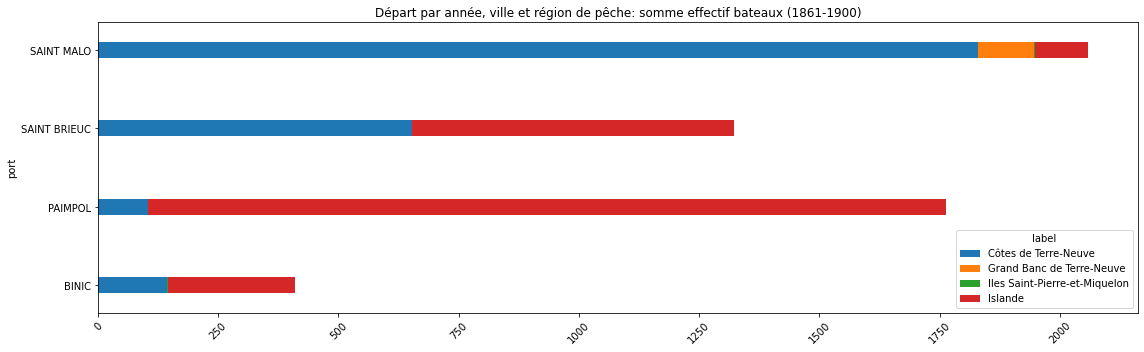

In [514]:
exp_piv_2.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux (1861-1900)')
plt.xticks(rotation=45)
plt.show()

# Évolution de la pêche 1816-1915

## Évolution des destinations par périodes de 5 ans (lieux de pêche)

In [519]:
result_dfm[140:145]

,valeurs,effectif,page,page_number,port,annee,eff_bateaux,lieu_peche,code,label,_merge
140,"[1614, HONFLEUR, 15, 30, 0, 140, 0, BREARD 1899 ]",8,88,89,HONFLEUR,1614,15,30,30,Côtes de Terre-Neuve,both
141,"[1614, DUNKERQUE, 7, 50, 0, 0, 0! RIN 1936 ]",7,88,89,DUNKERQUE,1614,7,50,50,Islande,both
142,"[1615, HONFLEUR, 10, 1, 0, 290, OTBRE ARD, 1899 ]",8,88,89,HONFLEUR,1615,10,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
143,"[1615, SAINT MALO, 7, 32, 0, 0, 0, MORAND, JRE...",8,88,89,SAINT MALO,1615,7,32,32,Terre-Neuve : Petit-Nord,both
144,"[1616, HONFLEUR, ""Ï3, 1, 0, 0, "" 0 BREARD J899 ]",7,88,89,HONFLEUR,1616,Ï3,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both


In [604]:
lustres = [x for x in range(1816,1915, 5)]
lustres[:5], lustres[-5:]

([1816, 1821, 1826, 1831, 1836], [1891, 1896, 1901, 1906, 1911])

In [594]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


peche_1816_1915 = result_dfm[result_dfm['annee'].between(1816,1915)].copy(deep=True)
peche_1816_1915['lustre'] = pd.cut(peche_1816_1915['annee'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
peche_1816_1915['lustre'] = peche_1816_1915['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
# Inspection
peche_1816_1915.head()

,valeurs,effectif,page,page_number,port,annee,eff_bateaux,lieu_peche,code,label,_merge,lustre
893,"[1816, ST BRIEUC, 24, 30, 1079, 3823, 01 MORAN...",7,102,103,SAINT BRIEUC,1816,24,30,30,Côtes de Terre-Neuve,both,1816-1821
910,"[1818, CHERBOURG, 3, 10, 31, 223, 0, ANMARCC5 ...",8,102,103,CHERBOURG,1818,3,10,10,Grand Banc de Terre-Neuve,both,1816-1821
921,"[1818, ST BRIEUC, 29, 30, 1487, 4495, 2771, AN...",8,102,103,SAINT BRIEUC,1818,29,30,30,Côtes de Terre-Neuve,both,1816-1821
923,"[1818, ST MALO, 46, 30, 1799, 5980, 0, ANAMACC...",9,102,103,SAINT MALO,1818,46,30,30,Côtes de Terre-Neuve,both,1816-1821
924,"[1818, ST MALO, 2, 10, 83, 270, 0, ANMARCC5 600 ]",8,102,103,SAINT MALO,1818,2,10,10,Grand Banc de Terre-Neuve,both,1816-1821


In [ ]:
peche_1816_1915['eff_bateaux'] = peche_1816_1915['eff_bateaux'].apply(lambda x : int(x) if x.isdigit() else 0)

In [566]:
### regrouper et additionner par port et destination pour toute la période
g_peche = peche_1816_1915.groupby(['lustre','label'])['eff_bateaux'].sum().reset_index(name='sum')
g_peche.iloc[35:45]

,lustre,label,sum
35,1826-1831,Terre-Neuve : Petit-Nord,0
36,1831-1836,Acadie,0
37,1831-1836,Côte du Labrador,0
38,1831-1836,Côtes de Terre-Neuve,518
39,1831-1836,Dogger Bank,7
40,1831-1836,Grand Banc de Terre-Neuve,330
41,1831-1836,Groenland,0
42,1831-1836,Iles Saint-Pierre-et-Miquelon,319
43,1831-1836,Islande,369
44,1831-1836,"Lieu de pêche imprécis, Terre-Neuve au sens large",0


In [567]:
g_peche[g_peche['sum']>0]

,lustre,label,sum
2,1816-1821,Côtes de Terre-Neuve,560
4,1816-1821,Grand Banc de Terre-Neuve,208
6,1816-1821,Iles Saint-Pierre-et-Miquelon,27
7,1816-1821,Islande,227
10,1816-1821,Mer du Nord,152
...,...,...,...
211,1901-1906,Islande,773
218,1906-1911,Côtes de Terre-Neuve,1019
219,1906-1911,Dogger Bank,247
222,1906-1911,Iles Saint-Pierre-et-Miquelon,311


In [568]:
X = 'lustre'
Y = 'label'
Z = 'sum'
piv_peche = pd.pivot_table(g_peche[g_peche['sum']>0],values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
piv_peche

label,Côtes de Terre-Neuve,Dogger Bank,Grand Banc de Terre-Neuve,Groenland,Iles Saint-Pierre-et-Miquelon,Islande,"Lieu de pêche imprécis, Terre-Neuve au sens large",Mer Baltique,Mer du Nord,Total
lustre,,,,,,,,,,
1816-1821,560,0,208,0,27,227,0,0,152,1174
1821-1826,670,0,98,0,4,317,16,0,70,1175
1826-1831,524,0,100,0,0,380,0,10,48,1062
1831-1836,518,7,330,0,319,369,0,0,0,1543
1836-1841,706,0,788,0,59,483,0,0,0,2036
1841-1846,200,0,187,0,37,384,0,0,0,808
1846-1851,87,0,69,0,1,399,0,0,0,556
1851-1856,178,0,95,0,2,698,84,0,0,1057
1856-1861,135,0,155,0,204,903,681,0,0,2078


26854.726034854408


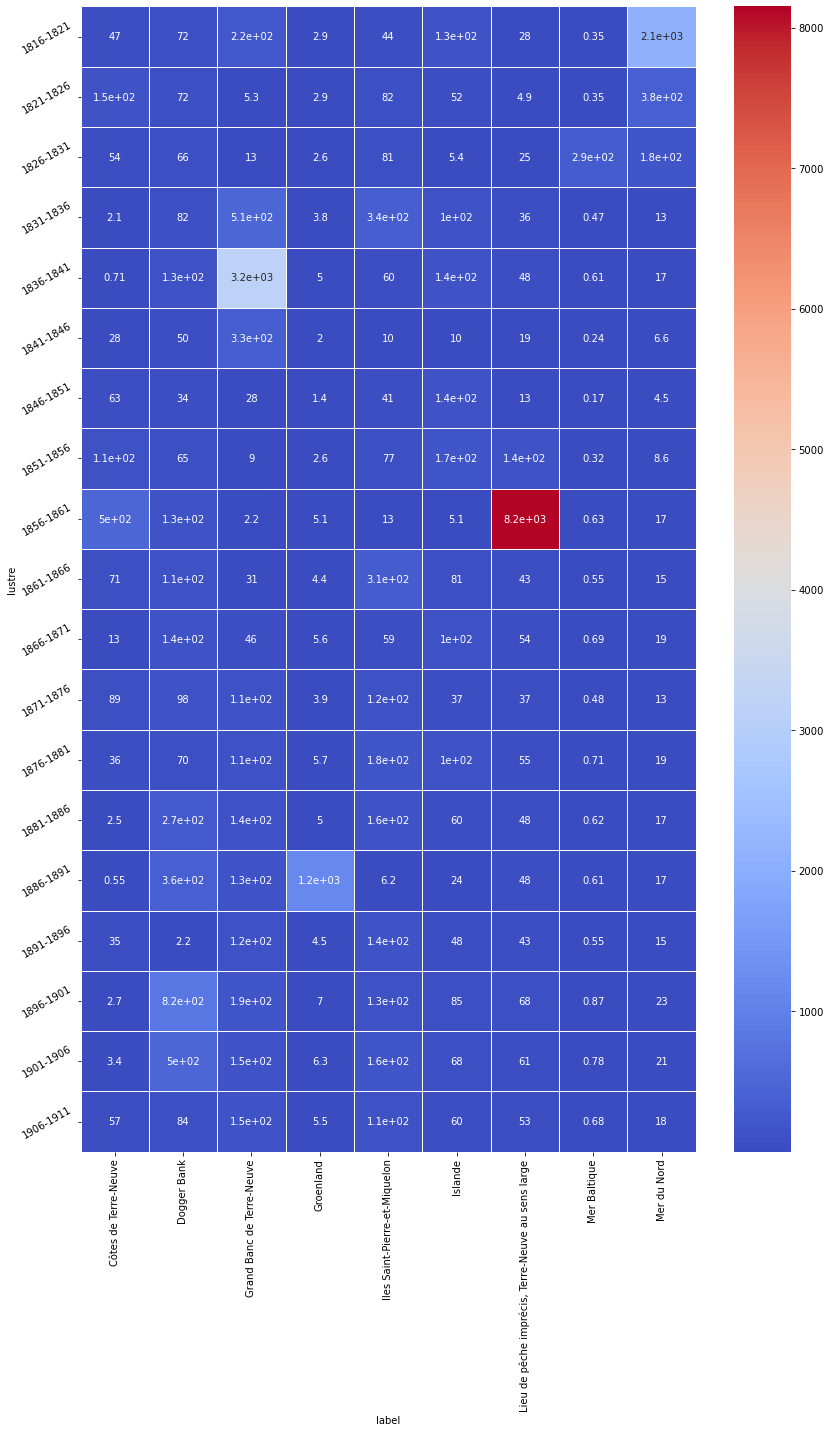

In [611]:
table_chi2(piv_peche,(12,20))

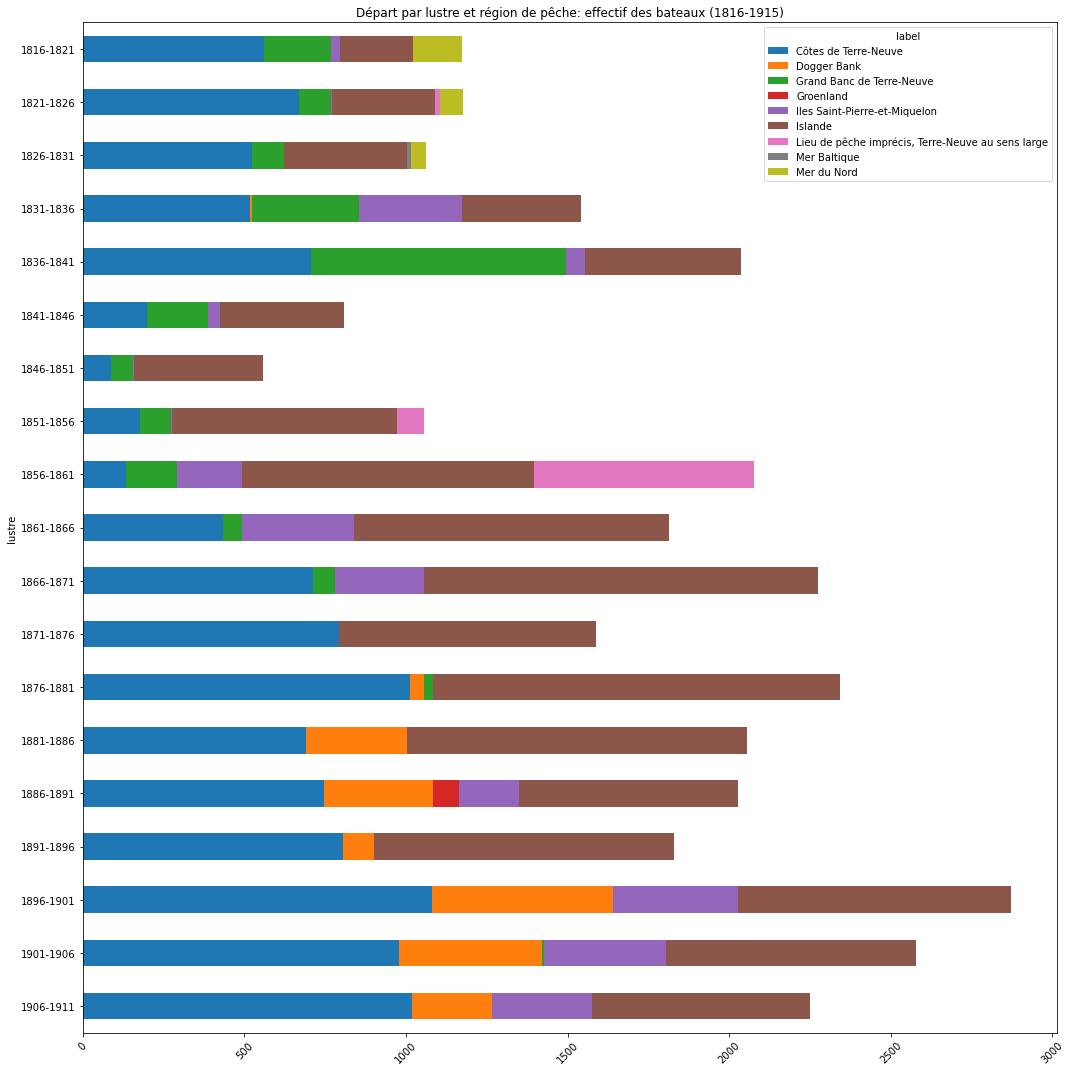

In [624]:
piv_peche.iloc[:-1,:-1].sort_index(ascending=False).plot( kind='barh', stacked=True,  width=0.5,  figsize=(15,15),  \
                             title = 'Départ par lustre et région de pêche: effectif des bateaux (1816-1915)')
plt.xticks(rotation=45)
plt.show()

## Évolution de l'activité des ports (périodes de 5 ans)

In [616]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

port_1816_1915 = result_dfm[(result_dfm['annee'].between(1816,1915)) & (result_dfm['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO|DUNK|FECA|GRANV"))].copy(deep=True)
port_1816_1915['lustre'] = pd.cut(port_1816_1915['annee'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
port_1816_1915['lustre'] = port_1816_1915['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
# Inspection
port_1816_1915.head()

,valeurs,effectif,page,page_number,port,annee,eff_bateaux,lieu_peche,code,label,_merge,lustre
887,"[1816, GRANVILLE, 55, 30, 0, 0, 0 GIBON 1911 ]",7,102,103,GRANVILLE,1816,55,30,30,Côtes de Terre-Neuve,both,1816-1821
888,"[1816, DUNKERQUE, 60, 50, 863, 4618, 2542, HDU...",8,102,103,DUNKERQUE,1816,60,50,50,Islande,both,1816-1821
889,"[1816, DUNKERQUE, 4, 30, 53, 371, 2531 H DU RI...",7,102,103,DUNKERQUE,1816,4,30,30,Côtes de Terre-Neuve,both,1816-1821
890,"[1816, DUNKERQUE, 29, 70, 280, 1432, 354 ' H D...",7,102,103,DUNKERQUE,1816,29,70,70,Mer du Nord,both,1816-1821
892,"[1816, FECAMP, 7, 30, 100, 607, 0| MORANDIERE ...",7,102,103,FECAMP,1816,7,30,30,Côtes de Terre-Neuve,both,1816-1821


In [617]:
port_1816_1915['eff_bateaux'] = port_1816_1915['eff_bateaux'].apply(lambda x : int(x) if x.isdigit() else 0)

In [618]:
### regrouper et additionner par port et destination pour toute la période
g_port = port_1816_1915.groupby(['lustre','port'])['eff_bateaux'].sum().reset_index(name='sum')
g_port.iloc[35:45]

,lustre,port,sum
35,1836-1841,GRANVILLE,0
36,1836-1841,PAIMPOL,0
37,1836-1841,SAINT BRIEUC,0
38,1836-1841,SAINT MALO,0
39,1836-1841,SAINTMALO,0
40,1841-1846,BINIC,0
41,1841-1846,DUNKERQUE,384
42,1841-1846,FECAMP,38
43,1841-1846,GRANVILLE,94
44,1841-1846,PAIMPOL,10


In [619]:
g_port[g_port['sum']>0]

,lustre,port,sum
1,1816-1821,DUNKERQUE,351
2,1816-1821,FECAMP,20
3,1816-1821,GRANVILLE,266
5,1816-1821,SAINT BRIEUC,91
6,1816-1821,SAINT MALO,48
...,...,...,...
146,1906-1911,FECAMP,230
147,1906-1911,GRANVILLE,114
148,1906-1911,PAIMPOL,215
149,1906-1911,SAINT BRIEUC,21


In [620]:
X = 'lustre'
Y = 'port'
Z = 'sum'
piv_port = pd.pivot_table(g_port[g_port['sum']>0],values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
piv_port

port,BINIC,DUNKERQUE,FECAMP,GRANVILLE,PAIMPOL,SAINT BRIEUC,SAINT MALO,Total
lustre,,,,,,,,
1816-1821,0,351,20,266,0,91,48,776
1821-1826,0,298,0,48,0,0,74,420
1826-1831,30,421,48,223,43,142,190,1097
1831-1836,0,60,14,0,0,0,0,74
1836-1841,0,0,0,0,0,0,0,0
1841-1846,0,384,38,94,10,70,162,758
1846-1851,0,362,0,0,0,35,98,495
1851-1856,0,290,31,84,0,0,225,630
1856-1861,0,465,39,747,115,92,81,1539


6924.240369272918


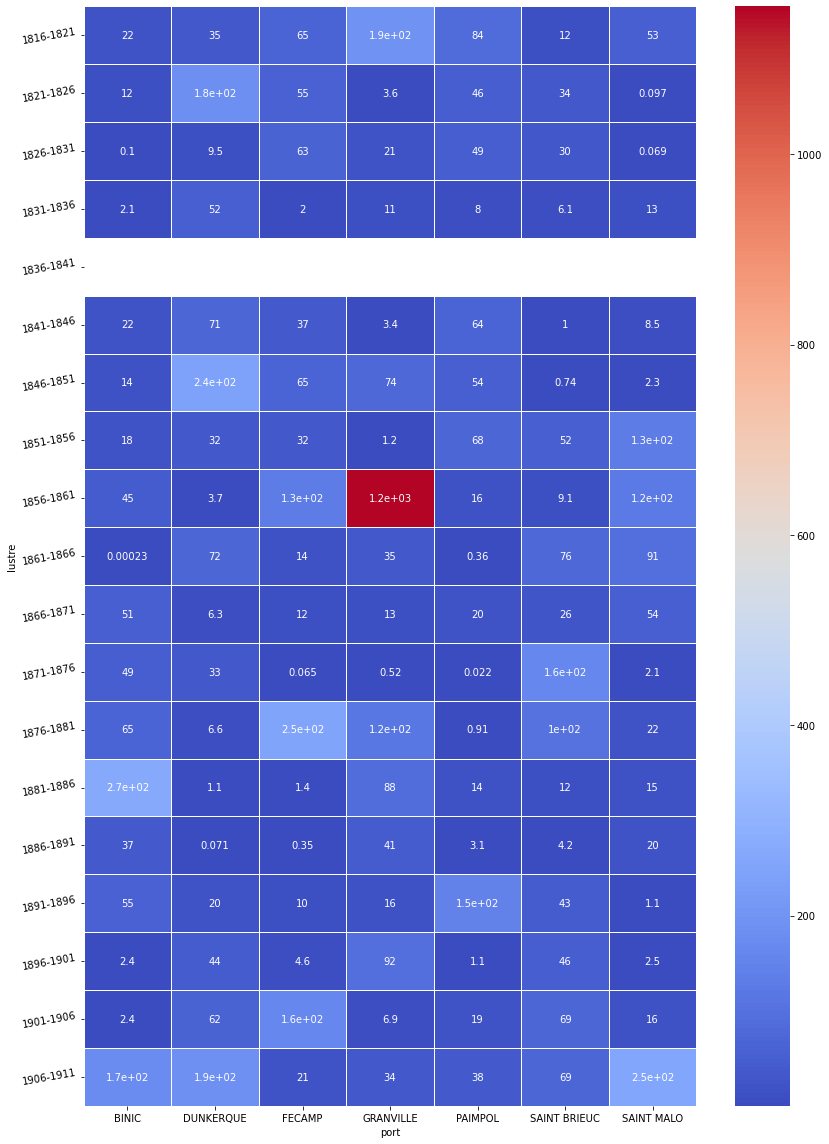

In [621]:
table_chi2(piv_port,(12,16))

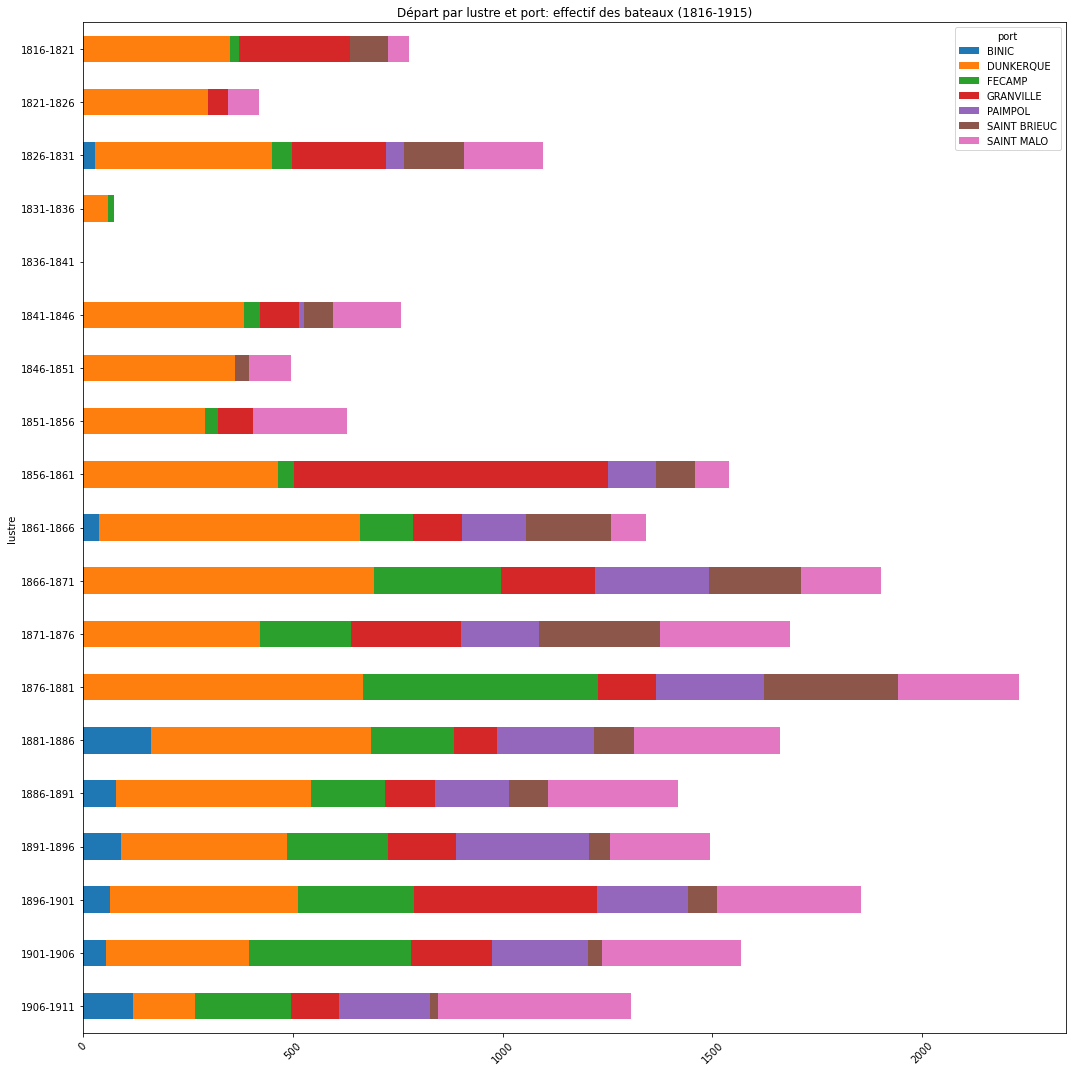

In [623]:
piv_port.iloc[:-1,:-1].sort_index(ascending=False).plot( kind='barh', stacked=True,  width=0.5,  figsize=(15,15),  \
                             title = 'Départ par lustre et port: effectif des bateaux (1816-1915)')
plt.xticks(rotation=45)
plt.show()